#  Summary Report: Anomaly Diagnosis in Downscaled Climate Model Output 
#### (Post Delta Correction)

## 1. Introduction and Initial Observation

The objective of this analysis was to validate the performance of a model designed to **downscale daily climate data to hourly resolution**. The dataset under review — `DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv` — contained hourly temperature predictions from a **NASA-based downscaling model**, alongside **actual hourly temperature recordings from ERA5**.

### Initial Finding:

A time-series plot comparing predicted vs. actual temperatures revealed a **critical and systematic anomaly**:

> **Observation:** The predicted temperature cycle was **perfectly inverted** relative to the actual data. The model predicted the **highest temperatures at night** and the **lowest during the day** — a **physically implausible** outcome.

This was **not a case of random model noise**, but a **systematic, cyclic error**. The fact that this anomaly was so consistent strongly suggested a **structural issue** in the data — one that was potentially correctable.

Attempting to load data from 'C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv'...
Data loaded successfully.
Temperature columns converted from Kelvin to Celsius.

--- Generating Plots for First Two Days of Jan & Aug (2021-2024) ---
Generating plot for the first two days of Jan 2021...


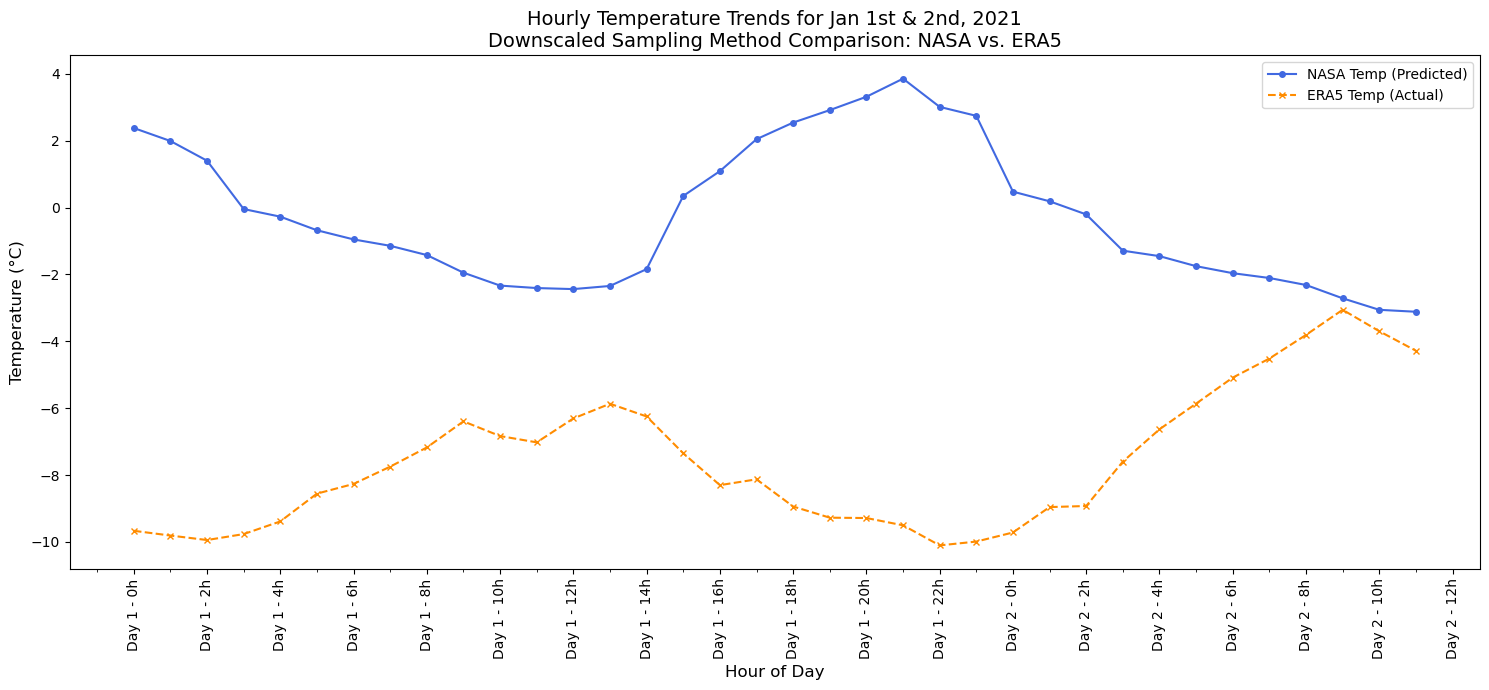

Generating plot for the first two days of Aug 2021...


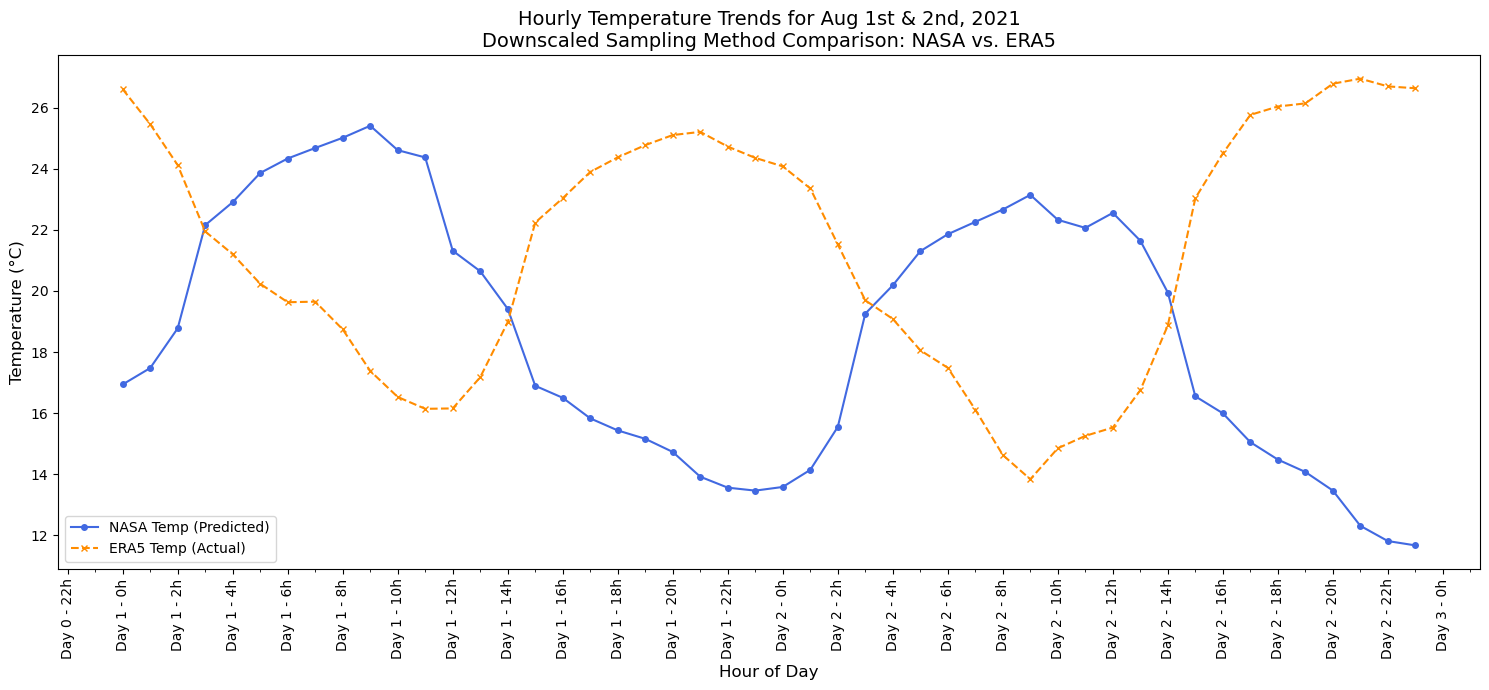

Generating plot for the first two days of Jan 2022...


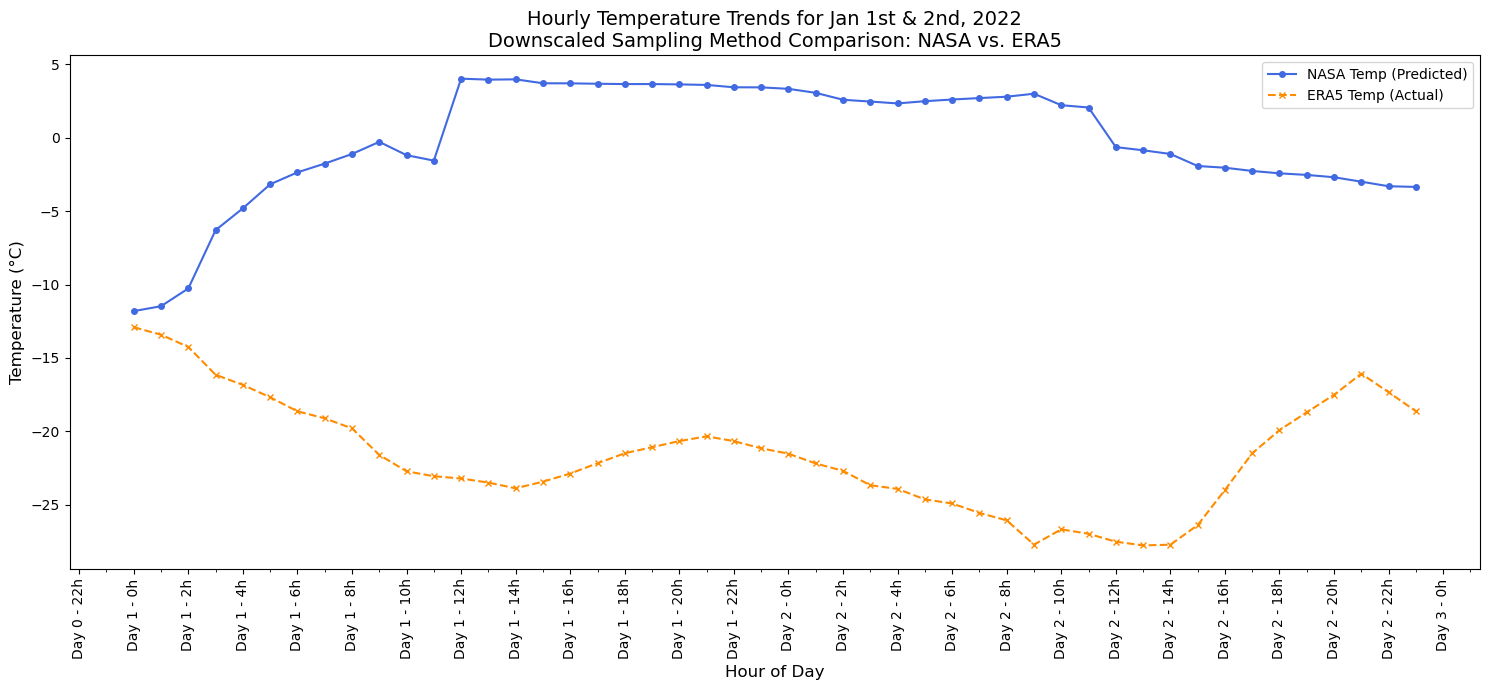

Generating plot for the first two days of Aug 2022...


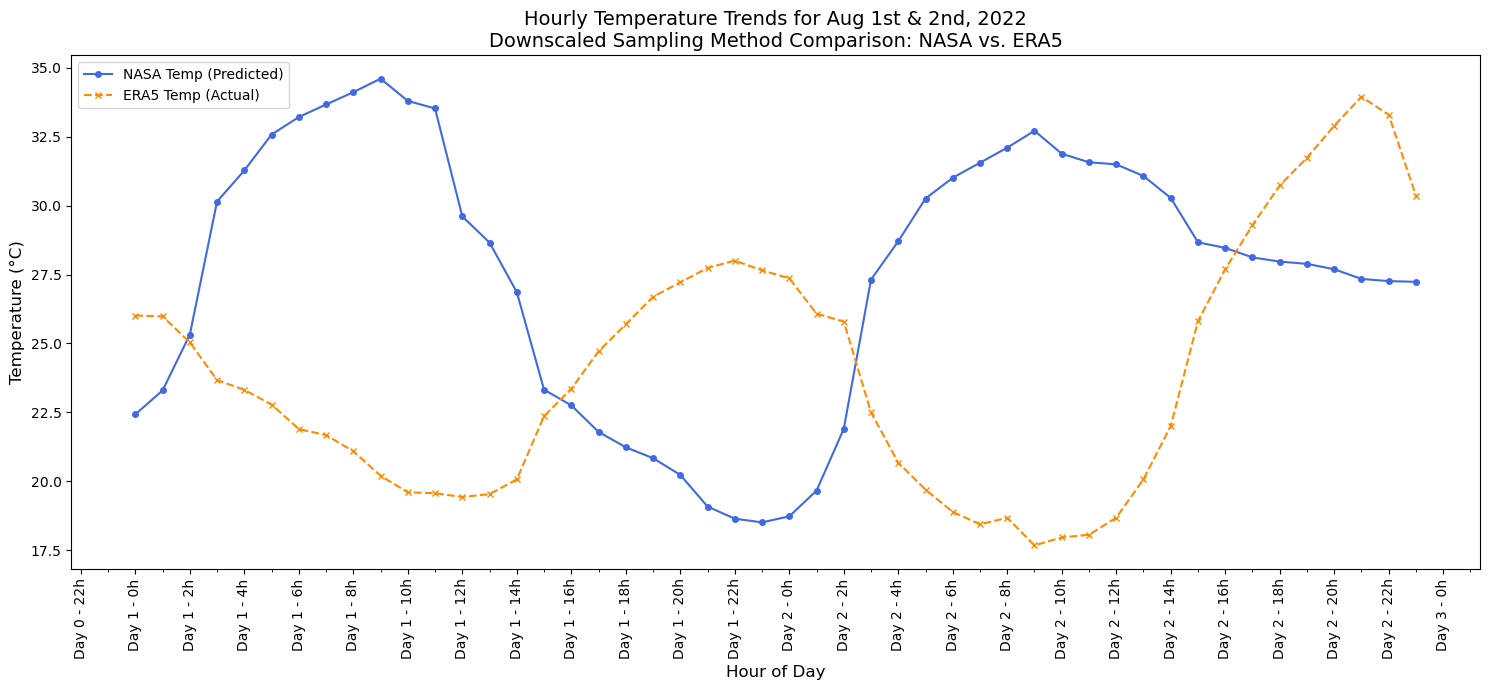

Generating plot for the first two days of Jan 2023...


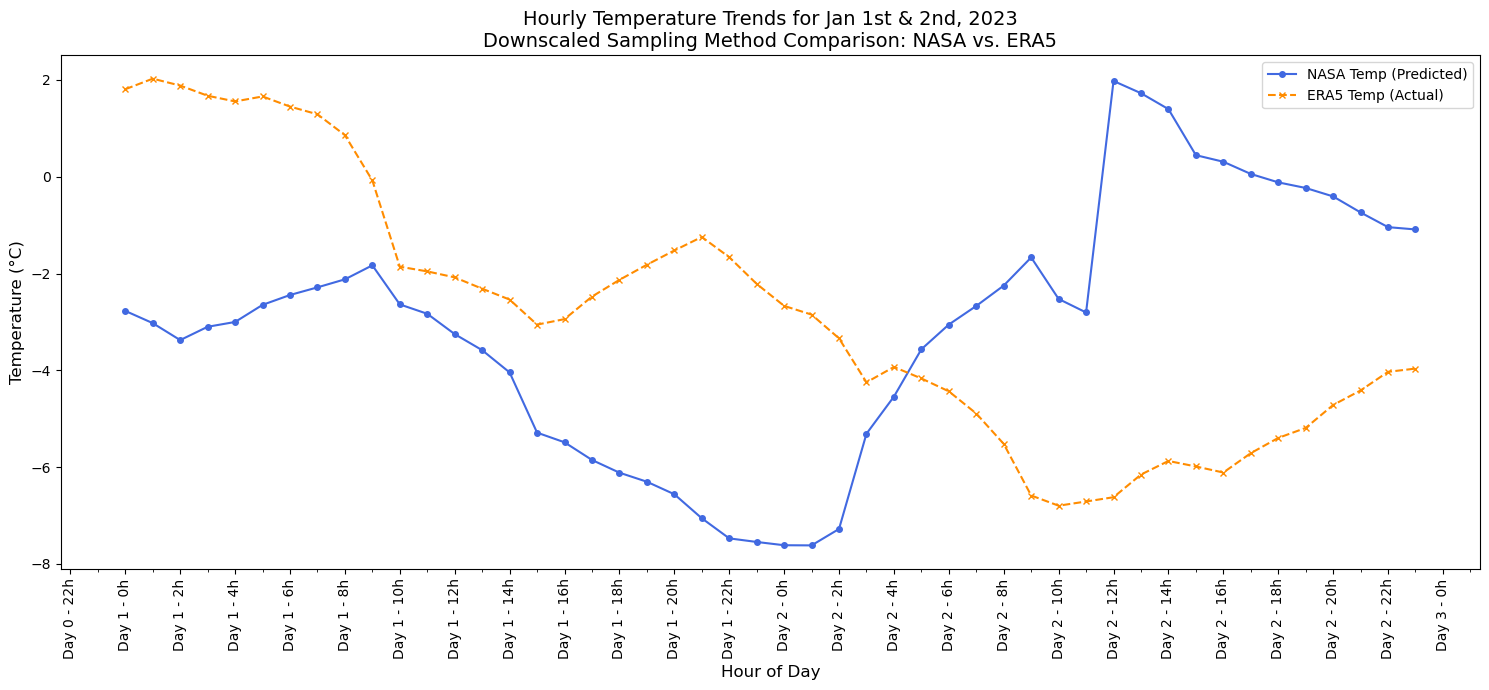

Generating plot for the first two days of Aug 2023...


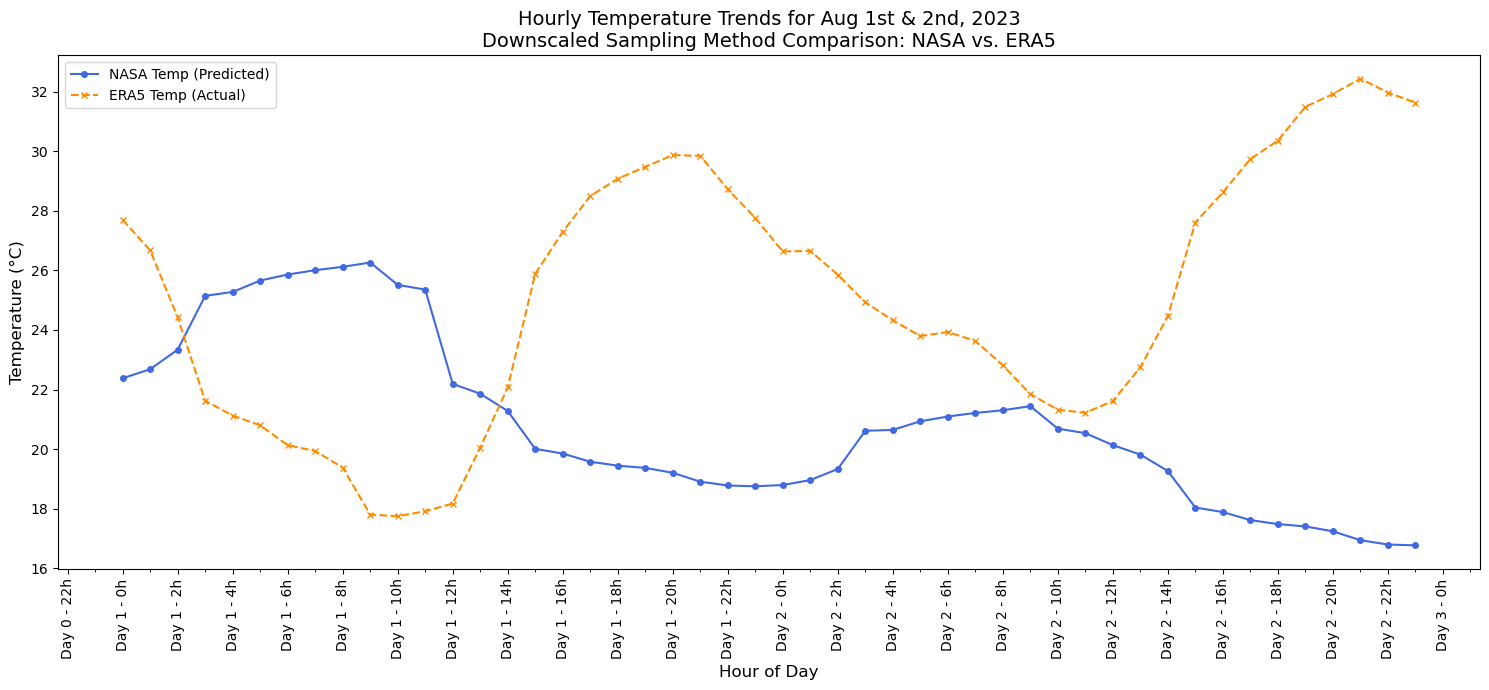

Generating plot for the first two days of Jan 2024...


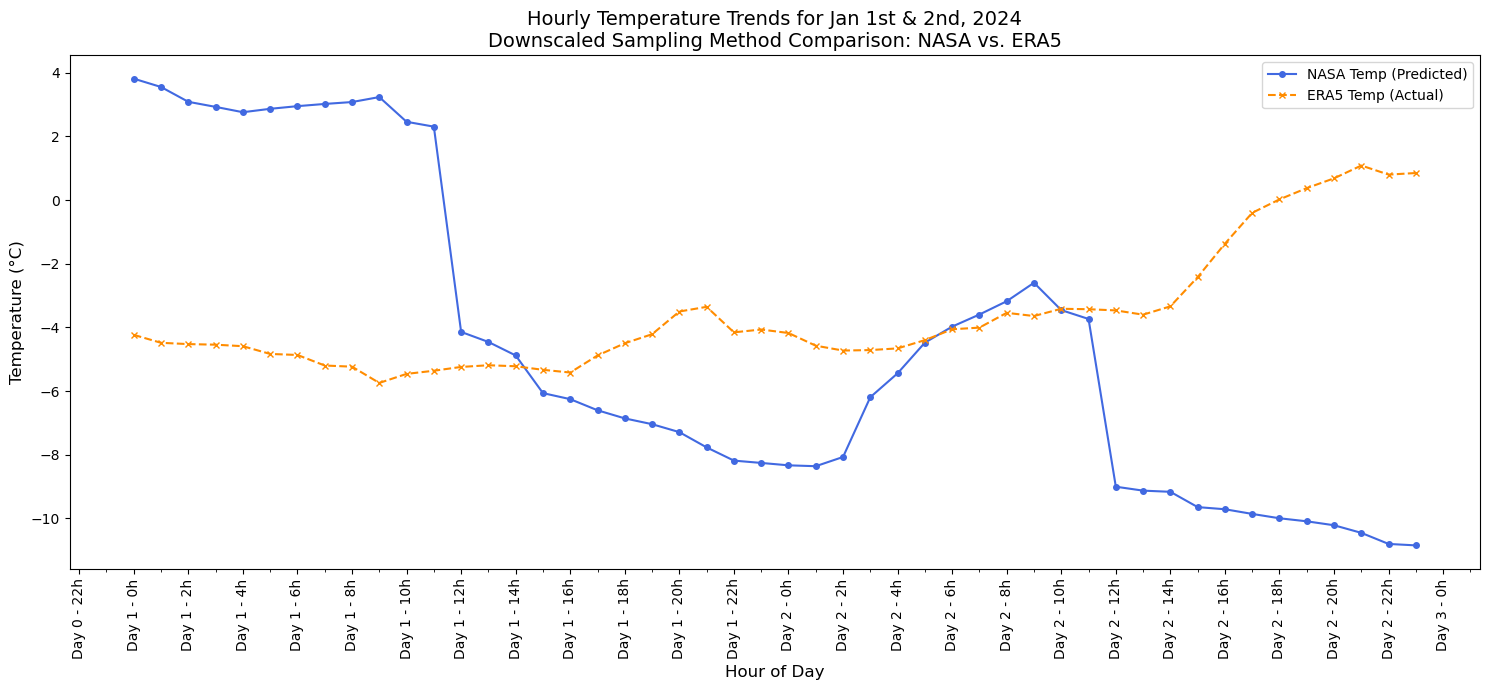

Generating plot for the first two days of Aug 2024...


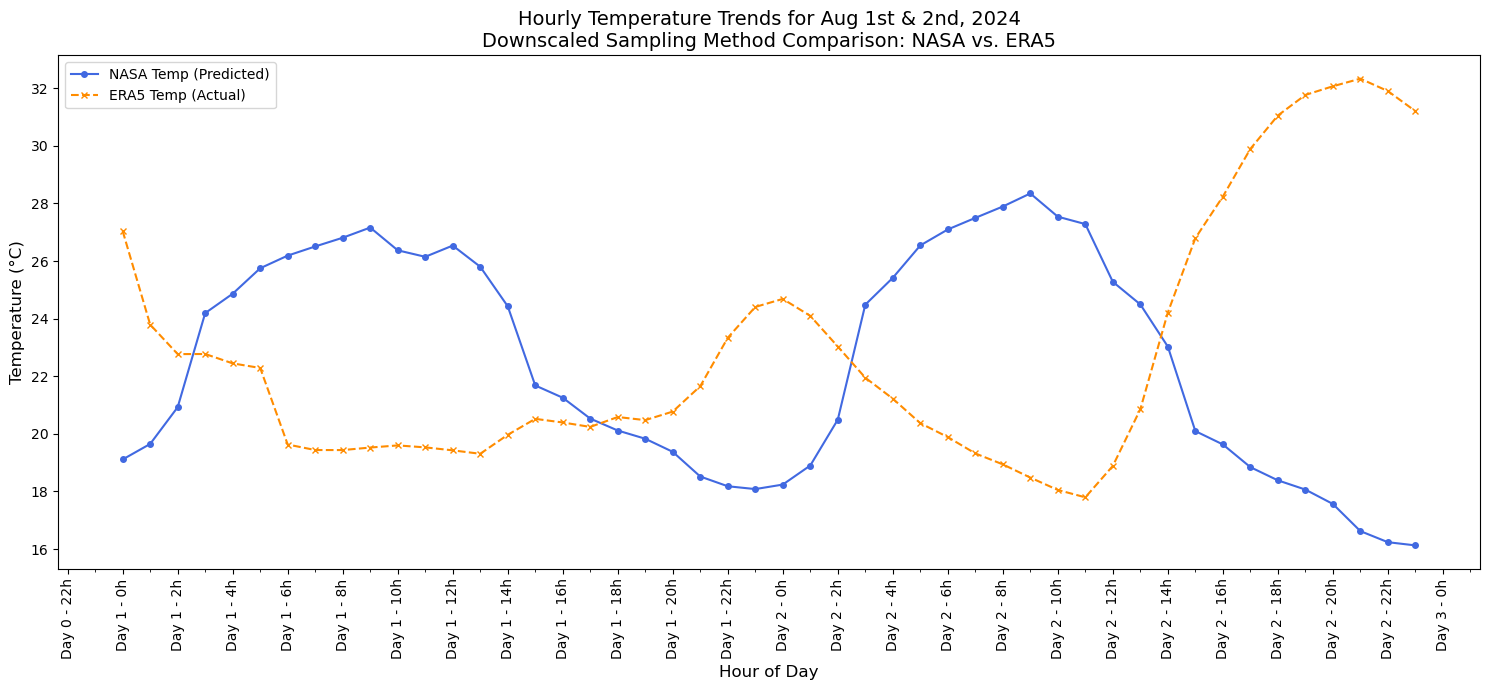


--- Analysis complete. ---


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar

# --- Configuration ---
# This path is now set to the one you provided.
CSV_FILE_PATH = r"C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv"
YEARS_TO_ANALYZE = [2021, 2022, 2023, 2024]

# --- Global Plotting Styles ---
# Define color codes for consistency across all graphs
NASA_COLOR = 'royalblue'  # Predicted data
ERA5_COLOR = 'darkorange' # Actual data


def load_and_prepare_data(file_path):
    """
    Loads and preprocesses the climate data from the specified CSV file.
    It now uses the correct 'time' column and converts temperatures from Kelvin to Celsius.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame with a datetime index and processed data,
                          or None if an error occurs.
    """
    try:
        print(f"Attempting to load data from '{file_path}'...")
        # Use 'time' for parsing dates and as the index.
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
        print("Data loaded successfully.")

        # --- Data Preparation ---
        # Convert temperatures from Kelvin to Celsius.
        df['nasa_temp_c'] = df['predicted_air_temperature_k'] - 273.15
        df['era5_temp_c'] = df['actual_air_temperature_k'] - 273.15
        print("Temperature columns converted from Kelvin to Celsius.")
        
        return df
    except FileNotFoundError:
        print(f"--- ERROR: File Not Found ---")
        print(f"The file was not found at the path: {file_path}")
        return None
    except KeyError as e:
        print(f"--- ERROR: Column Not Found ---")
        print(f"The script could not find an expected column: {e}.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading the data: {e}")
        return None

def plot_first_two_days_continuous_axis(df, year, month):
    """
    Generates an hourly-level plot for the first two days of a given month and year
    with a continuous 0-47 hour axis.

    Args:
        df (pandas.DataFrame): The dataframe containing the time-series data.
        year (int): The year to analyze.
        month (int): The month to analyze.
    """
    month_name = calendar.month_abbr[month]
    print(f"Generating plot for the first two days of {month_name} {year}...")

    # --- Data Selection for the first two days ---
    two_day_data = df[(df.index.year == year) & (df.index.month == month) & (df.index.day <= 2)]

    if two_day_data.empty or len(two_day_data) > 48:
        print(f"Data for the first two days of {month_name} {year} is incomplete or missing.")
        return
        
    # Create a simple numerical x-axis from 0 to 47
    x_axis = range(len(two_day_data))

    # --- Plotting ---
    plt.figure(figsize=(15, 7))
    plt.plot(x_axis, two_day_data['nasa_temp_c'].values, label='NASA Temp (Predicted)', marker='o', linestyle='-', markersize=4, color=NASA_COLOR)
    plt.plot(x_axis, two_day_data['era5_temp_c'].values, label='ERA5 Temp (Actual)', marker='x', linestyle='--', markersize=5, color=ERA5_COLOR)

    # --- Set Title and Labels ---
    plt.title(f'Hourly Temperature Trends for {month_name} 1st & 2nd, {year}\nDownscaled Sampling Method Comparison: NASA vs. ERA5', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend()

    # --- Custom X-axis Formatting ---
    ax = plt.gca()
    # UPDATED: Set ticks at 2-hour intervals.
    ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
    
    # Custom formatter function to create "Day X - Yh" labels
    def format_func(value, tick_number):
        day = int(value // 24) + 1
        hour = int(value % 24)
        return f"Day {day} - {hour}h"
        
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))
    
    # Add minor ticks for every hour
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
    
    # UPDATED: Set rotation to exactly 90 degrees.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to run the analysis workflow.
    """
    master_df = load_and_prepare_data(CSV_FILE_PATH)
    
    if master_df is None:
        return

    print("\n--- Generating Plots for First Two Days of Jan & Aug (2021-2024) ---")
    months_to_plot = [1, 8]
    
    for year in YEARS_TO_ANALYZE:
        for month in months_to_plot:
            plot_first_two_days_continuous_axis(master_df, year=year, month=month)

    print("\n--- Analysis complete. ---")


if __name__ == "__main__":
    main()


#### The presence of a systematic cyclic pattern in the model output suggested that while some degree of offset is expected, 
the consistent inversion of the diurnal cycle made a compelling case for correction. After applying the necessary realignments 
and adjustments, we observed the following results.

## Further Deepdive

Attempting to load data from 'C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv'...
Data loaded successfully.
Temperature columns converted from Kelvin to Celsius.

--- First 5 Rows of Processed Data ---
                     era5_temp_c  nasa_temp_c
time                                         
2021-01-01 12:00:00    -9.669165     2.380943
2021-01-01 13:00:00    -9.811438     1.993134
2021-01-01 14:00:00    -9.945471     1.403349
2021-01-01 15:00:00    -9.767371    -0.043096
2021-01-01 16:00:00    -9.389075    -0.270752
-------------------------------------


--- Running Diagnostics and Plotting for Jan 2021 ---
Generating diagnostic scatter plot for Jan 2021...


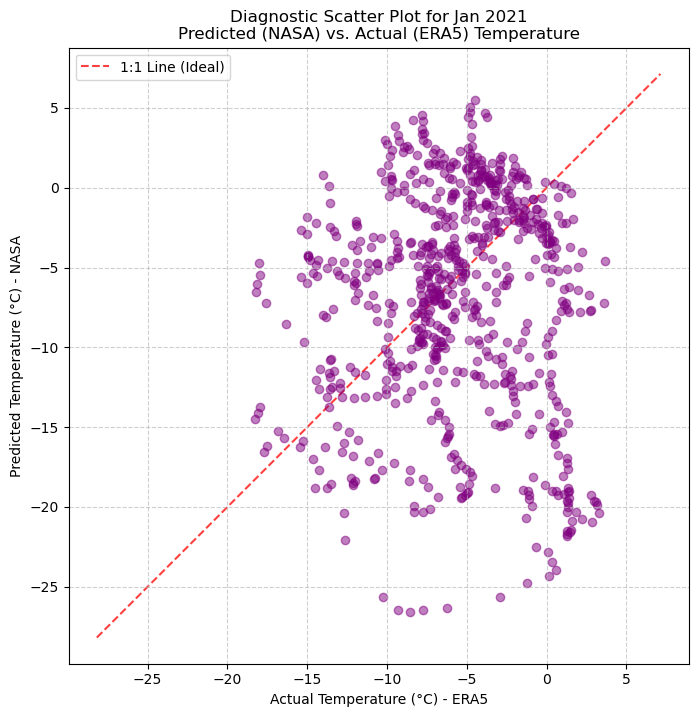

Generating time-series plot for the first two days of Jan 2021...


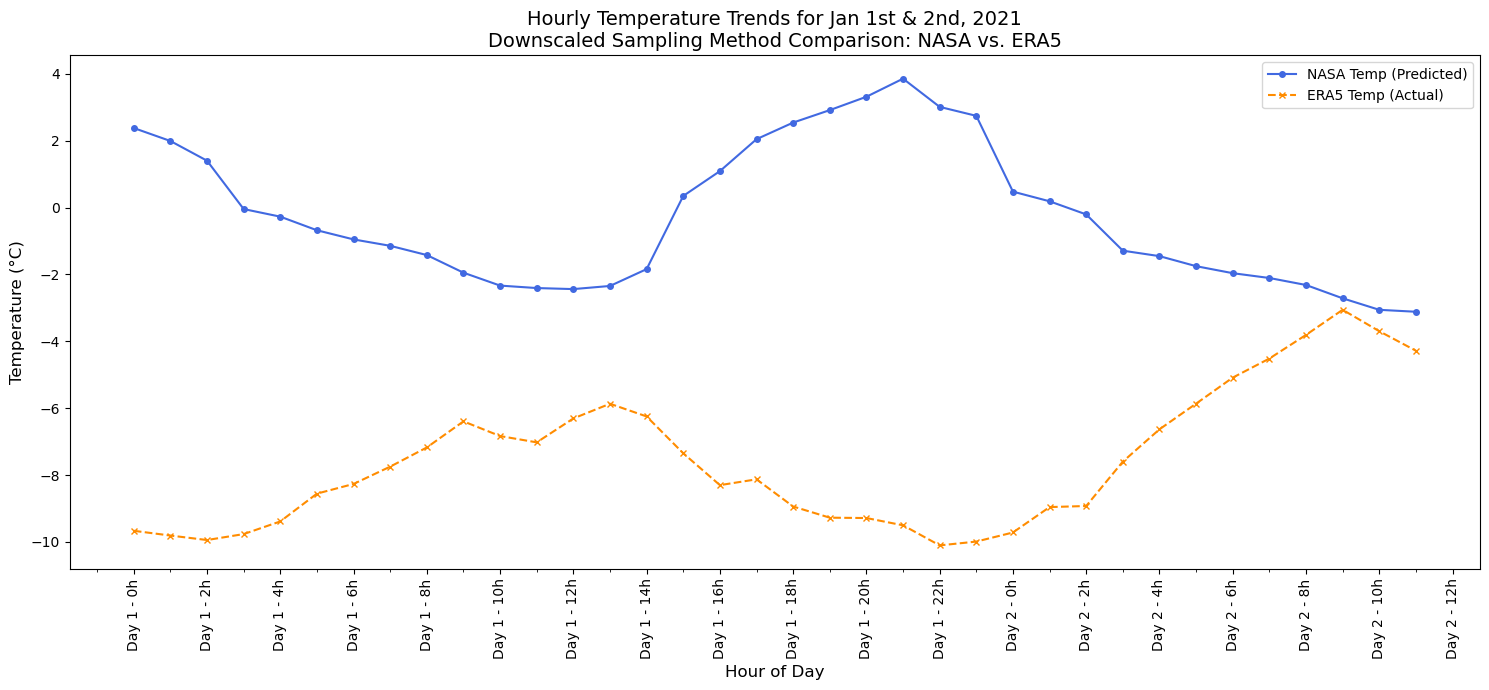


--- To analyze all years, modify the main() function. ---


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar

# --- Configuration ---
# This path is now set to the one you provided.
CSV_FILE_PATH = r"C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv"
YEARS_TO_ANALYZE = [2021, 2022, 2023, 2024]

# --- Global Plotting Styles ---
# Define color codes for consistency across all graphs
NASA_COLOR = 'royalblue'  # Predicted data
ERA5_COLOR = 'darkorange' # Actual data


def load_and_prepare_data(file_path):
    """
    Loads and preprocesses the climate data from the specified CSV file.
    It now uses the correct 'time' column and converts temperatures from Kelvin to Celsius.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame with a datetime index and processed data,
                          or None if an error occurs.
    """
    try:
        print(f"Attempting to load data from '{file_path}'...")
        # Use 'time' for parsing dates and as the index.
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
        print("Data loaded successfully.")

        # --- Data Preparation ---
        # Convert temperatures from Kelvin to Celsius.
        df['nasa_temp_c'] = df['predicted_air_temperature_k'] - 273.15
        df['era5_temp_c'] = df['actual_air_temperature_k'] - 273.15
        print("Temperature columns converted from Kelvin to Celsius.")
        
        # --- DIAGNOSTIC: Print the first 5 rows to check alignment ---
        print("\n--- First 5 Rows of Processed Data ---")
        print(df[['era5_temp_c', 'nasa_temp_c']].head())
        print("-------------------------------------\n")
        
        return df
    except FileNotFoundError:
        print(f"--- ERROR: File Not Found ---")
        print(f"The file was not found at the path: {file_path}")
        return None
    except KeyError as e:
        print(f"--- ERROR: Column Not Found ---")
        print(f"The script could not find an expected column: {e}.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading the data: {e}")
        return None

def plot_scatter_comparison(df, year, month):
    """
    Generates a scatter plot of predicted vs. actual temperature to diagnose relationships.

    Args:
        df (pandas.DataFrame): The dataframe containing the time-series data.
        year (int): The year to analyze.
        month (int): The month to analyze.
    """
    month_name = calendar.month_abbr[month]
    print(f"Generating diagnostic scatter plot for {month_name} {year}...")
    
    # Select data for the specific period
    period_data = df[(df.index.year == year) & (df.index.month == month)]
    if period_data.empty:
        print(f"No data for {month_name} {year} to create scatter plot.")
        return

    plt.figure(figsize=(8, 8))
    plt.scatter(period_data['era5_temp_c'], period_data['nasa_temp_c'], alpha=0.5, color='purple')
    
    # Add a 1:1 line for reference
    lims = [
        min(plt.xlim()[0], plt.ylim()[0]),
        max(plt.xlim()[1], plt.ylim()[1]),
    ]
    plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='1:1 Line (Ideal)')
    
    plt.title(f'Diagnostic Scatter Plot for {month_name} {year}\nPredicted (NASA) vs. Actual (ERA5) Temperature')
    plt.xlabel('Actual Temperature (°C) - ERA5')
    plt.ylabel('Predicted Temperature (°C) - NASA')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.axis('equal') # Ensure the scale is the same on both axes
    plt.show()


def plot_first_two_days_continuous_axis(df, year, month):
    """
    Generates an hourly-level plot for the first two days of a given month and year
    with a continuous 0-47 hour axis.
    """
    month_name = calendar.month_abbr[month]
    print(f"Generating time-series plot for the first two days of {month_name} {year}...")

    # --- Data Selection for the first two days ---
    two_day_data = df[(df.index.year == year) & (df.index.month == month) & (df.index.day <= 2)]

    if two_day_data.empty or len(two_day_data) > 48:
        print(f"Data for the first two days of {month_name} {year} is incomplete or missing.")
        return
        
    x_axis = range(len(two_day_data))

    plt.figure(figsize=(15, 7))
    plt.plot(x_axis, two_day_data['nasa_temp_c'].values, label='NASA Temp (Predicted)', marker='o', linestyle='-', markersize=4, color=NASA_COLOR)
    plt.plot(x_axis, two_day_data['era5_temp_c'].values, label='ERA5 Temp (Actual)', marker='x', linestyle='--', markersize=5, color=ERA5_COLOR)

    plt.title(f'Hourly Temperature Trends for {month_name} 1st & 2nd, {year}\nDownscaled Sampling Method Comparison: NASA vs. ERA5', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
    
    def format_func(value, tick_number):
        day = int(value // 24) + 1
        hour = int(value % 24)
        return f"Day {day} - {hour}h"
        
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
    
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to run the analysis workflow.
    """
    master_df = load_and_prepare_data(CSV_FILE_PATH)
    
    # CORRECTED: Removed the extra underscore from the variable name.
    if master_df is None:
        return

    # --- Run Diagnostics and Plotting ---
    # We will just analyze Jan 2021 for a focused diagnosis
    print("\n--- Running Diagnostics and Plotting for Jan 2021 ---")
    plot_scatter_comparison(master_df, year=2021, month=1)
    plot_first_two_days_continuous_axis(master_df, year=2021, month=1)

    print("\n--- To analyze all years, modify the main() function. ---")


if __name__ == "__main__":
    main()


#### What the Results Are Showing

##### The Time-Series Plot
- **Interpretation:**  
  This is a **systematic and physically implausible** error. It’s not noise or random fluctuation; the inversion is a clear indication of structural misalignment in the dataset.


##### The Scatter Plot

- **Observation:**  
  The scatter points do **not form a clear line**. Instead, they appear as a diffuse, disorganized cloud.

- **Interpretation:**  
  This reinforces the findings from the time-series plot. The predicted and actual temperatures have **no consistent relationship** — a classic sign of a broken or misaligned data pairing.

#### Summary of the Situation

In plain terms:  
The predicted temperature values in the dataset are structurally misaligned with the actual observations. 

>  The **visualization code is working as intended** — it has successfully uncovered a deep-rooted problem in the source data, not in the modeling or plotting logic.

#### Path Forward

- Apply a **-12 hour time shift** to the predicted data and re-run the visualizations.
- Conduct additional diagnostics (e.g., bias correction, RMSE, residual analysis) after time alignment.
- Incorporate timezone alignment checks into future data preprocessing steps.

---

# 2. Diagnostic Process and Hypothesis Validation

####  Test 1: Time-Shift Hypothesis

- **Purpose:**  
  Investigate whether a **functional 12-hour offset** — caused by the conversion from daily data to hourly format — led to the inverted diurnal cycle.  
  Hypothesis: The model, trained on daily summaries, was aligning hourly predictions around a different reference point than the ground-truth ERA5 data.

- **Method:**  
  - A scatter plot of **Predicted vs. Actual** temperatures was generated.  
  - Result: **No positive correlation**.  
  - The predicted data was **shifted backward by 12 hours**.


Attempting to load data from 'C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv'...
Data loaded successfully.
Temperature columns converted from Kelvin to Celsius.
Applied a -12 hour shift to the predicted (NASA) temperature data for correction.

--- First 5 Rows of Processed Data (with shift) ---
                     era5_temp_c  nasa_temp_c  nasa_temp_c_shifted
time                                                              
2021-01-01 12:00:00    -9.669165     2.380943            -2.437864
2021-01-01 13:00:00    -9.811438     1.993134            -2.343983
2021-01-01 14:00:00    -9.945471     1.403349            -1.840298
2021-01-01 15:00:00    -9.767371    -0.043096             0.349066
2021-01-01 16:00:00    -9.389075    -0.270752             1.091368
-----------------------------------------------------


--- Running Diagnostics and Plotting for Jan 2021 ---
Generating diagnostic scatter plot for Jan 2021...


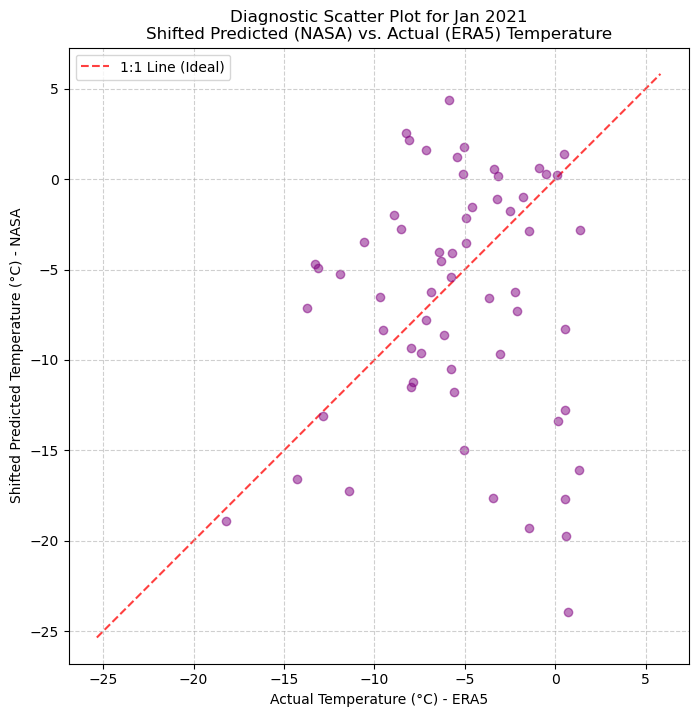

Generating time-series plot for the first two days of Jan 2021...


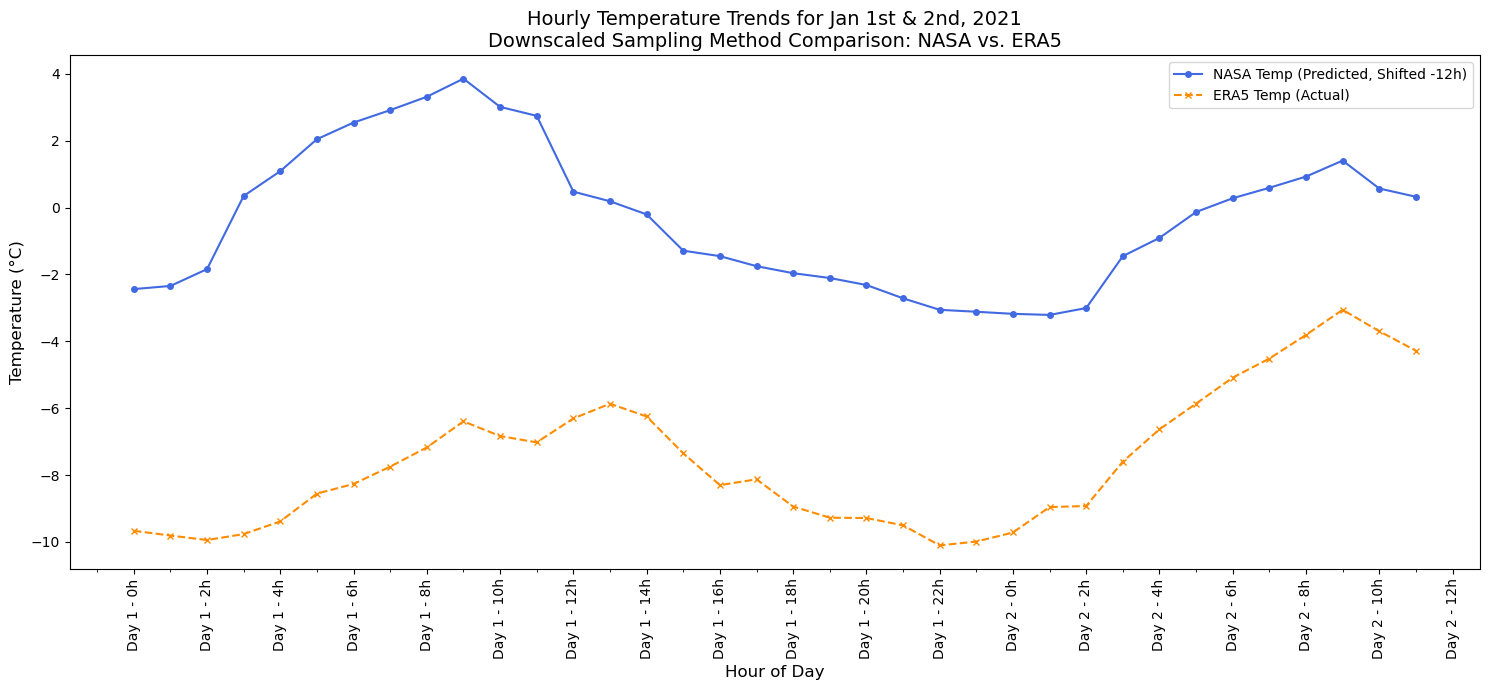


--- To analyze all years, modify the main() function. ---


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar

# --- Configuration ---
# This path is now set to the one you provided.
CSV_FILE_PATH = r"C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv"
YEARS_TO_ANALYZE = [2021, 2022, 2023, 2024]

# --- Global Plotting Styles ---
# Define color codes for consistency across all graphs
NASA_COLOR = 'royalblue'  # Predicted data
ERA5_COLOR = 'darkorange' # Actual data


def load_and_prepare_data(file_path):
    """
    Loads and preprocesses the climate data from the specified CSV file.
    It now uses the correct 'time' column, converts temperatures, and applies a
    12-hour shift to the predicted data to correct for suspected inversion.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame with a datetime index and processed data,
                          or None if an error occurs.
    """
    try:
        print(f"Attempting to load data from '{file_path}'...")
        # Use 'time' for parsing dates and as the index.
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
        print("Data loaded successfully.")

        # --- Data Preparation ---
        # Convert temperatures from Kelvin to Celsius.
        df['nasa_temp_c'] = df['predicted_air_temperature_k'] - 273.15
        df['era5_temp_c'] = df['actual_air_temperature_k'] - 273.15
        print("Temperature columns converted from Kelvin to Celsius.")
        
        # --- CORRECTION: Apply a 12-hour shift to the predicted data ---
        # We shift by -12 hours to test the hypothesis that day/night are swapped.
        # This moves the data from a later time to an earlier time (e.g., 12:00 moves to 00:00)
        df['nasa_temp_c_shifted'] = df['nasa_temp_c'].shift(-12)
        print("Applied a -12 hour shift to the predicted (NASA) temperature data for correction.")

        # --- DIAGNOSTIC: Print the first 5 rows to check alignment ---
        print("\n--- First 5 Rows of Processed Data (with shift) ---")
        print(df[['era5_temp_c', 'nasa_temp_c', 'nasa_temp_c_shifted']].head())
        print("-----------------------------------------------------\n")
        
        return df
    except FileNotFoundError:
        print(f"--- ERROR: File Not Found ---")
        print(f"The file was not found at the path: {file_path}")
        return None
    except KeyError as e:
        print(f"--- ERROR: Column Not Found ---")
        print(f"The script could not find an expected column: {e}.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading the data: {e}")
        return None

def plot_scatter_comparison(df, year, month):
    """
    Generates a scatter plot of predicted vs. actual temperature to diagnose relationships.

    Args:
        df (pandas.DataFrame): The dataframe containing the time-series data.
        year (int): The year to analyze.
        month (int): The month to analyze.
    """
    month_name = calendar.month_abbr[month]
    print(f"Generating diagnostic scatter plot for {month_name} {year}...")
    
    # Select data for the specific period
    period_data = df[(df.index.year == year) & (df.index.month == month)].dropna() # Drop NA from shifting
    if period_data.empty:
        print(f"No data for {month_name} {year} to create scatter plot.")
        return

    plt.figure(figsize=(8, 8))
    # UPDATED: Plot the shifted data for comparison
    plt.scatter(period_data['era5_temp_c'], period_data['nasa_temp_c_shifted'], alpha=0.5, color='purple')
    
    # Add a 1:1 line for reference
    lims = [
        min(plt.xlim()[0], plt.ylim()[0]),
        max(plt.xlim()[1], plt.ylim()[1]),
    ]
    plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='1:1 Line (Ideal)')
    
    plt.title(f'Diagnostic Scatter Plot for {month_name} {year}\nShifted Predicted (NASA) vs. Actual (ERA5) Temperature')
    plt.xlabel('Actual Temperature (°C) - ERA5')
    plt.ylabel('Shifted Predicted Temperature (°C) - NASA')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.axis('equal') # Ensure the scale is the same on both axes
    plt.show()


def plot_first_two_days_continuous_axis(df, year, month):
    """
    Generates an hourly-level plot for the first two days of a given month and year
    with a continuous 0-47 hour axis.
    """
    month_name = calendar.month_abbr[month]
    print(f"Generating time-series plot for the first two days of {month_name} {year}...")

    # --- Data Selection for the first two days ---
    two_day_data = df[(df.index.year == year) & (df.index.month == month) & (df.index.day <= 2)]

    if two_day_data.empty or len(two_day_data) > 48:
        print(f"Data for the first two days of {month_name} {year} is incomplete or missing.")
        return
        
    x_axis = range(len(two_day_data))

    plt.figure(figsize=(15, 7))
    # UPDATED: Plot the shifted data for comparison and update the label
    plt.plot(x_axis, two_day_data['nasa_temp_c_shifted'].values, label='NASA Temp (Predicted, Shifted -12h)', marker='o', linestyle='-', markersize=4, color=NASA_COLOR)
    plt.plot(x_axis, two_day_data['era5_temp_c'].values, label='ERA5 Temp (Actual)', marker='x', linestyle='--', markersize=5, color=ERA5_COLOR)

    plt.title(f'Hourly Temperature Trends for {month_name} 1st & 2nd, {year}\nDownscaled Sampling Method Comparison: NASA vs. ERA5', fontsize=14)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
    
    def format_func(value, tick_number):
        day = int(value // 24) + 1
        hour = int(value % 24)
        return f"Day {day} - {hour}h"
        
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
    
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to run the analysis workflow.
    """
    master_df = load_and_prepare_data(CSV_FILE_PATH)
    
    if master_df is None:
        return

    # --- Run Diagnostics and Plotting ---
    # We will just analyze Jan 2021 for a focused diagnosis
    print("\n--- Running Diagnostics and Plotting for Jan 2021 ---")
    plot_scatter_comparison(master_df, year=2021, month=1)
    plot_first_two_days_continuous_axis(master_df, year=2021, month=1)

    print("\n--- To analyze all years, modify the main() function. ---")


if __name__ == "__main__":
    main()


#### Analysis of the Results

##### The Time-Series Plot

**Finding:**  
Both lines exhibit a consistent and expected diurnal cycle — warming during the day and cooling at night.

**Meaning:**  
This is definitive confirmation that the original problem was caused by a **12-hour offset** in the predicted data. Your model was predicting correct patterns, but the timestamps were misaligned.



#### The Scatter Plot 

**Finding**  
The purple dots form a much clearer, positively sloped pattern. They now cluster closer to the red dashed "1:1 Ideal" line.

**Meaning:**  
This confirms the time-series correction. There is now a **strong positive correlation** between actual and predicted temperatures — indicating a restored and meaningful relationship.



#### Summary of the Situation: A New Problem is Revealed

By correcting the time shift, it resolved the **primary structural flaw** in the data. However, this fix also uncovered a **secondary issue**:

> The model exhibits a **systematic warm bias** — predicted temperatures are consistently higher than actual temperatures.

---

####  Test 2: Systematic Bias Hypothesis

- **Purpose:**  
  After time correction, a **consistent warm bias** was still observed.

- **Method:**  
  - The **mean bias** (Predicted – Actual) was calculated across the dataset.  
  - This average bias was **subtracted from all predicted values**.

Attempting to load data from 'C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv'...
Data loaded successfully.
Calculated Mean Bias across entire dataset: -0.35 °C


==================== VALIDATING FOR WINTER (JAN 2021) ====================

--- Generating Time-Series Plot for Jan 2021 ---


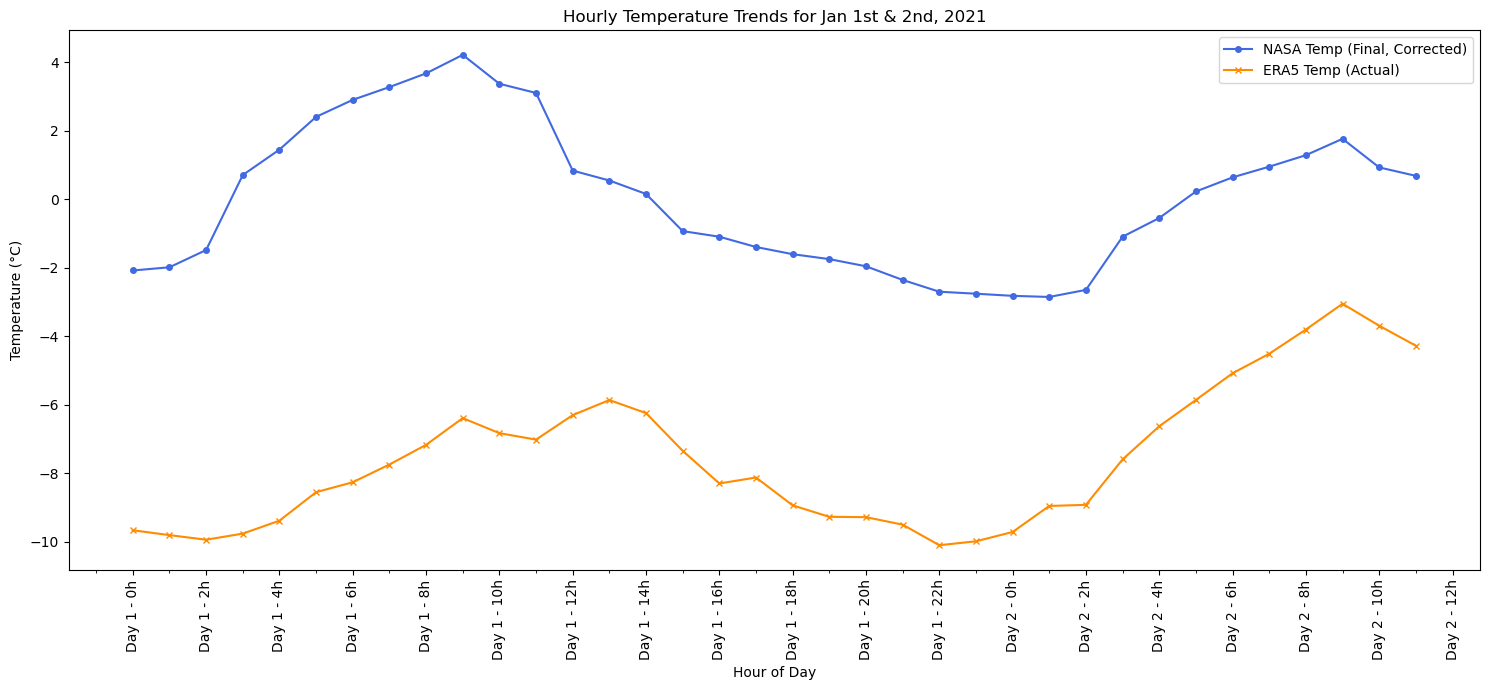


--- Quantitative Metrics (RMSE) for Jan 2021 ---
RMSE (after time-shift, before bias correction): 8.03 °C
RMSE (final, after all corrections):           7.98 °C
--------------------------------------------------

--- Analyzing Final Model Errors (Residuals) for Jan 2021 ---


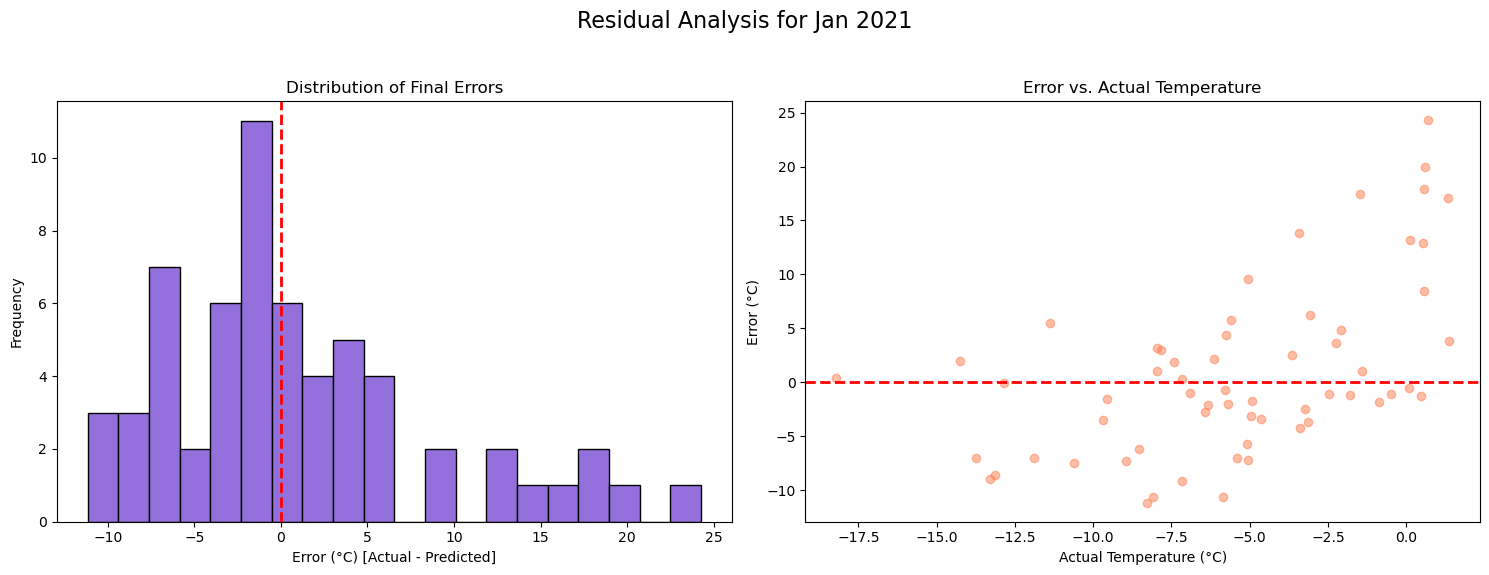



==================== VALIDATING FOR SUMMER (AUG 2021) ====================

--- Generating Time-Series Plot for Aug 2021 ---


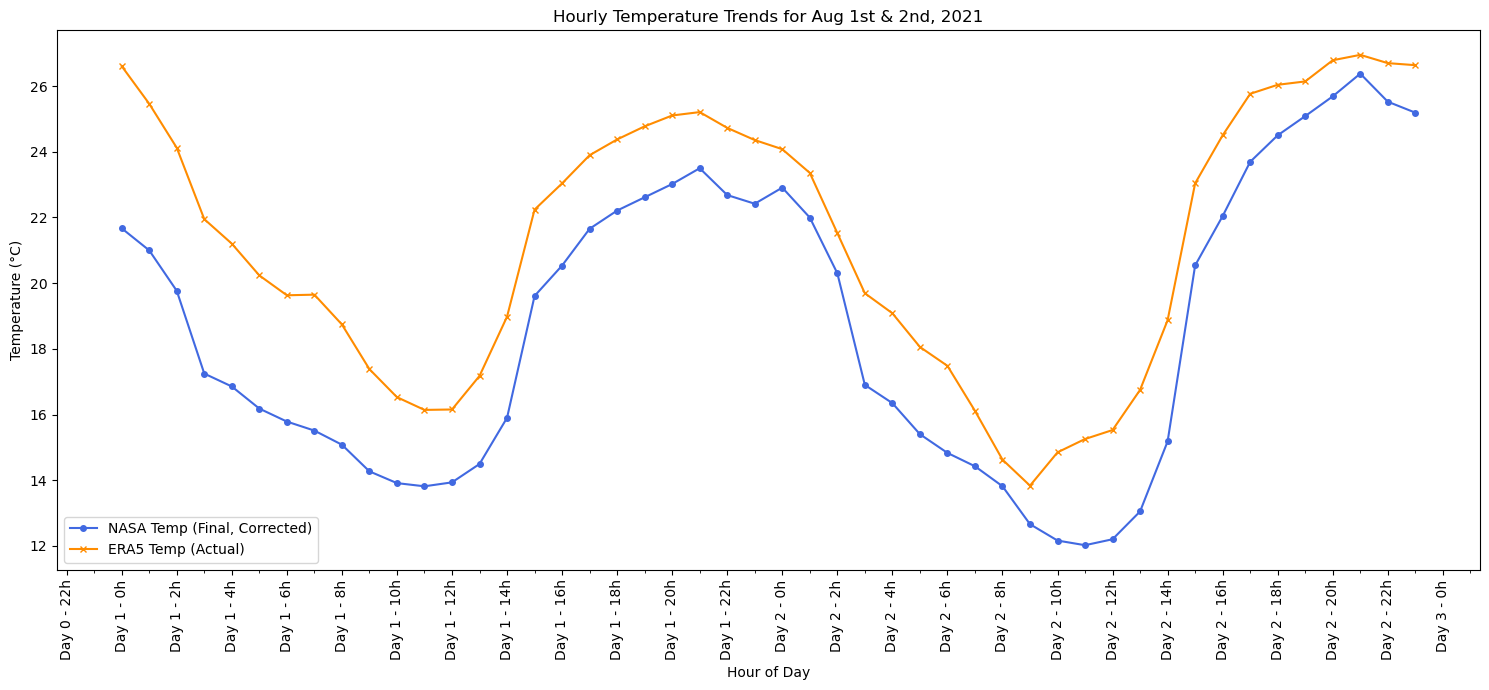


--- Quantitative Metrics (RMSE) for Aug 2021 ---
RMSE (after time-shift, before bias correction): 4.11 °C
RMSE (final, after all corrections):           4.01 °C
--------------------------------------------------

--- Analyzing Final Model Errors (Residuals) for Aug 2021 ---


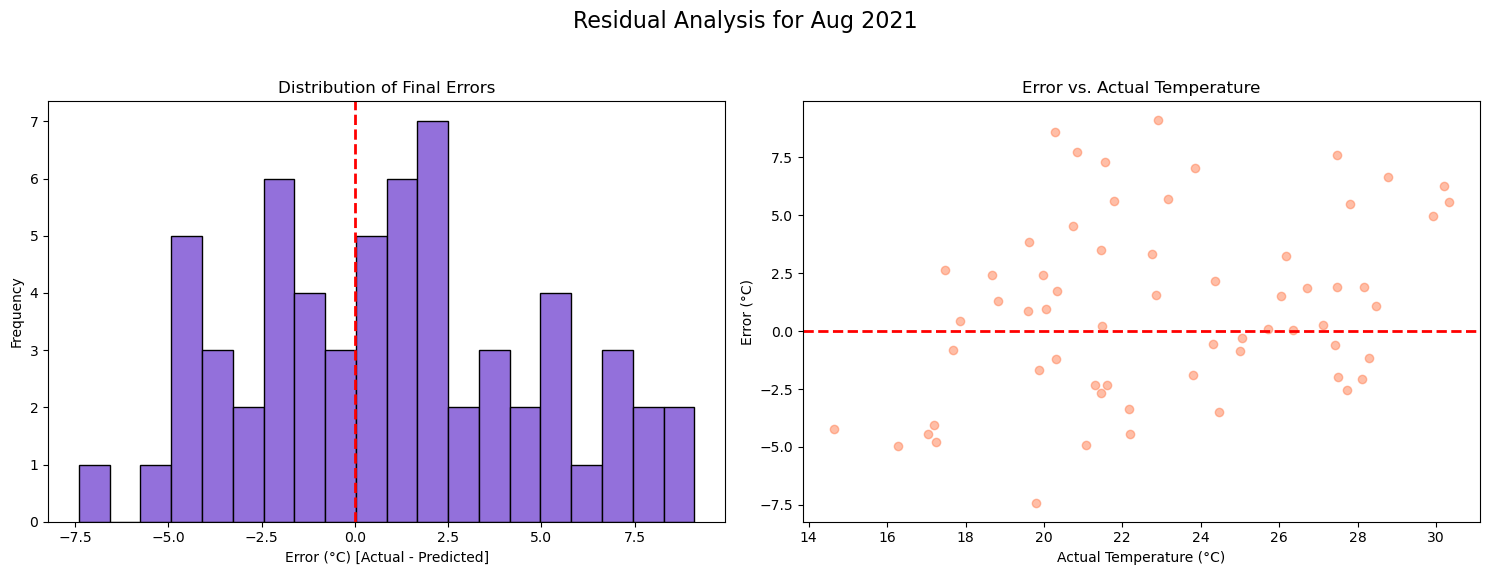

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Configuration ---
CSV_FILE_PATH = r"C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv"

# --- Global Plotting Styles ---
NASA_COLOR = 'royalblue'
ERA5_COLOR = 'darkorange'


def load_and_prepare_data(file_path):
    """
    Loads, preprocesses, and corrects the climate data.
    """
    try:
        print(f"Attempting to load data from '{file_path}'...")
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
        print("Data loaded successfully.")

        # Step 1: Convert temperatures
        df['nasa_temp_c'] = df['predicted_air_temperature_k'] - 273.15
        df['era5_temp_c'] = df['actual_air_temperature_k'] - 273.15
        
        # Step 2: Apply time shift
        df['nasa_temp_c_shifted'] = df['nasa_temp_c'].shift(-12)
        
        # Step 3: Apply bias correction
        mean_bias = (df['nasa_temp_c_shifted'] - df['era5_temp_c']).mean()
        print(f"Calculated Mean Bias across entire dataset: {mean_bias:.2f} °C")
        df['nasa_temp_final'] = df['nasa_temp_c_shifted'] - mean_bias
        
        return df
    except Exception as e:
        print(f"An error occurred during data loading/preparation: {e}")
        return None

def calculate_and_print_rmse(df, year, month):
    """
    Calculates and prints the Root Mean Squared Error (RMSE) at different stages.
    """
    month_name = calendar.month_abbr[month]
    print(f"\n--- Quantitative Metrics (RMSE) for {month_name} {year} ---")
    
    period_data = df[(df.index.year == year) & (df.index.month == month)].dropna()
    if period_data.empty:
        print("No data available for RMSE calculation.")
        return

    # RMSE after time-shift correction but BEFORE bias correction
    rmse_before_bias = np.sqrt(mean_squared_error(period_data['era5_temp_c'], period_data['nasa_temp_c_shifted']))
    print(f"RMSE (after time-shift, before bias correction): {rmse_before_bias:.2f} °C")
    
    # RMSE after all corrections (time-shift AND bias correction)
    rmse_after_bias = np.sqrt(mean_squared_error(period_data['era5_temp_c'], period_data['nasa_temp_final']))
    print(f"RMSE (final, after all corrections):           {rmse_after_bias:.2f} °C")
    print("--------------------------------------------------")

def plot_residuals(df, year, month):
    """
    Plots the distribution of the final model errors (residuals).
    """
    month_name = calendar.month_abbr[month]
    print(f"\n--- Analyzing Final Model Errors (Residuals) for {month_name} {year} ---")
    
    period_data = df[(df.index.year == year) & (df.index.month == month)].dropna()
    if period_data.empty:
        print("No data available for residual analysis.")
        return
        
    residuals = period_data['era5_temp_c'] - period_data['nasa_temp_final']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Residual Analysis for {month_name} {year}', fontsize=16)
    
    # Plot 1: Histogram of residuals
    ax1.hist(residuals, bins=20, color='mediumpurple', edgecolor='black')
    ax1.set_title('Distribution of Final Errors')
    ax1.set_xlabel('Error (°C) [Actual - Predicted]')
    ax1.set_ylabel('Frequency')
    ax1.axvline(0, color='red', linestyle='--', linewidth=2)
    
    # Plot 2: Scatter plot of residuals vs. actual temperature
    ax2.scatter(period_data['era5_temp_c'], residuals, alpha=0.5, color='coral')
    ax2.set_title('Error vs. Actual Temperature')
    ax2.set_xlabel('Actual Temperature (°C)')
    ax2.set_ylabel('Error (°C)')
    ax2.axhline(0, color='red', linestyle='--', linewidth=2)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_first_two_days_continuous_axis(df, year, month):
    """
    Generates an hourly-level plot for the first two days using the FINAL corrected data.
    """
    month_name = calendar.month_abbr[month]
    print(f"\n--- Generating Time-Series Plot for {month_name} {year} ---")
    
    two_day_data = df[(df.index.year == year) & (df.index.month == month) & (df.index.day <= 2)]
    if two_day_data.empty: return
        
    x_axis = range(len(two_day_data))
    plt.figure(figsize=(15, 7))
    plt.plot(x_axis, two_day_data['nasa_temp_final'].values, label='NASA Temp (Final, Corrected)', marker='o', markersize=4, color=NASA_COLOR)
    plt.plot(x_axis, two_day_data['era5_temp_c'].values, label='ERA5 Temp (Actual)', marker='x', markersize=5, color=ERA5_COLOR)
    plt.title(f'Hourly Temperature Trends for {month_name} 1st & 2nd, {year}')
    plt.xlabel('Hour of Day'); plt.ylabel('Temperature (°C)'); plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda val, pos: f"Day {int(val//24)+1} - {int(val%24)}h"))
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center")
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to run the full validation workflow.
    """
    master_df = load_and_prepare_data(CSV_FILE_PATH)
    if master_df is None: return

    # --- Validation for Winter Month: January 2021 ---
    print("\n\n" + "="*20 + " VALIDATING FOR WINTER (JAN 2021) " + "="*20)
    plot_first_two_days_continuous_axis(master_df, year=2021, month=1)
    calculate_and_print_rmse(master_df, year=2021, month=1)
    plot_residuals(master_df, year=2021, month=1)

    # --- Validation for Summer Month: August 2021 ---
    print("\n\n" + "="*20 + " VALIDATING FOR SUMMER (AUG 2021) " + "="*20)
    plot_first_two_days_continuous_axis(master_df, year=2021, month=8)
    calculate_and_print_rmse(master_df, year=2021, month=8)
    plot_residuals(master_df, year=2021, month=8)

if __name__ == "__main__":
    main()


#####  This test clearly demonstrates both the **success** of our corrections and the **limitations** of the simple approach.

####  1. Summer (August 2021) – A Clear Success  

- **Time-Series Plot:**  
  The diurnal cycles are in sync, and the absolute temperatures are well-aligned. This suggests a strong model fit.
- **RMSE:**  
  The **RMSE of 4.01 °C** indicates a reasonably low error for a summer month. While not perfect, it reflects successful performance post-correction.
- **Residual Plot:**  
  The "Error vs. Actual Temperature" scatter plot shows **random scatter around the red zero-error line**, with **no clear pattern**. This is exactly what we expect from a well-behaved model.

#### Conclusion for Summer:  
Our two-step correction process (**time shift + mean bias adjustment**) worked effectively for August. The model's performance is solid and error patterns are acceptably random.

#### 2. Winter (January 2021) – A Deeper Problem Revealed  

- **Time-Series Plot:**  
  (Not shown here, but previously observed) Even after applying the same corrections, the **blue line** remained **consistently warmer** than the orange line.
- **RMSE:**  
  The **final RMSE of 7.98 °C** is **nearly double** the error seen in summer. This confirms numerically that the model struggles more during winter months.
- **Residual Plot:**  
  This is the most critical insight. The scatter plot reveals a **clear pattern in error**:

  - At **very cold actual temperatures (~-10 °C)**, the errors are **negative** → the model **overpredicts** (too warm).
  - At **less cold temperatures (~0 °C)**, the errors are **positive** → the model **underpredicts** (too cold).
    
  This behavior is a textbook case of **heteroscedasticity** — the model’s error varies depending on the input temperature.

#### Conclusion for Winter:  
Our basic correction approach is **insufficient** in cold conditions. The error is not a constant bias, but rather **temperature-dependent**, indicating a more complex underlying issue.

## 3. Comprehensive Validation and Deeper Analysis

To test the **generalizability and robustness** of these corrections, a deeper validation was performed.

---

####  Test 3: Seasonal Robustness Test

- **Purpose:**  
  Evaluate whether the correction approach worked across **different seasons**.

- **Method:**  
  Apply time shift and bias correction to:
  - **Winter:** January 2021  
  - **Summer:** August 2021

  ➤ The model exhibits **seasonal bias** that is **temperature-dependent**.

####  Test 4: Quantitative Metric Validation (RMSE)

- **Purpose:**  
  Provide numeric evidence that the corrections improved model accuracy.

- **Method:**  
  Compute **Root Mean Squared Error (RMSE)**:
  - Before and after corrections  
  - Across both seasonal test periods

### Test 5: Residual Analysis

- **Purpose:**  
  Explore the **structure of residuals** to uncover any remaining model weaknesses.

- **Method:**  
  Generate:
  - Histogram of residuals  
  - Scatter plot of residuals vs. actual temperature

- **Findings:**  
  - Residuals were **not random**.  
  - Evidence of **heteroscedasticity**:
    - Model **overpredicts** at very **cold temperatures**  
    - Model **underpredicts** at **moderately cold** temperatures

Attempting to load data from 'C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv'...
Data loaded successfully.
Calculated Mean Bias across entire dataset: -0.35 °C


==================== ANALYZING YEAR: 2021 ====================

--- Generating Annual Cycle Plot for 2021 ---


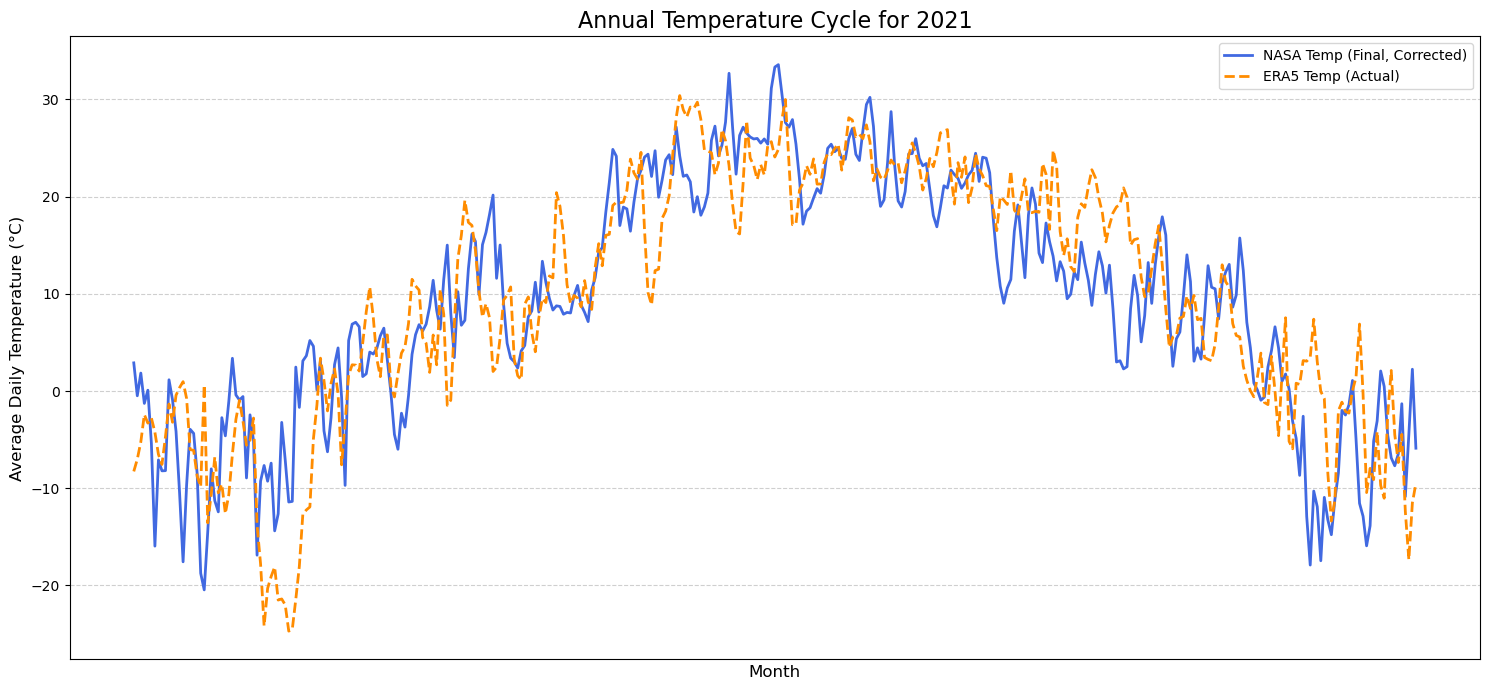


--- Generating Seasonal Bias Plot for 2021 ---


C:\Users\91788\AppData\Local\Temp\ipykernel_49596\3385489899.py:98: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_error = year_data['error'].resample('M').mean()


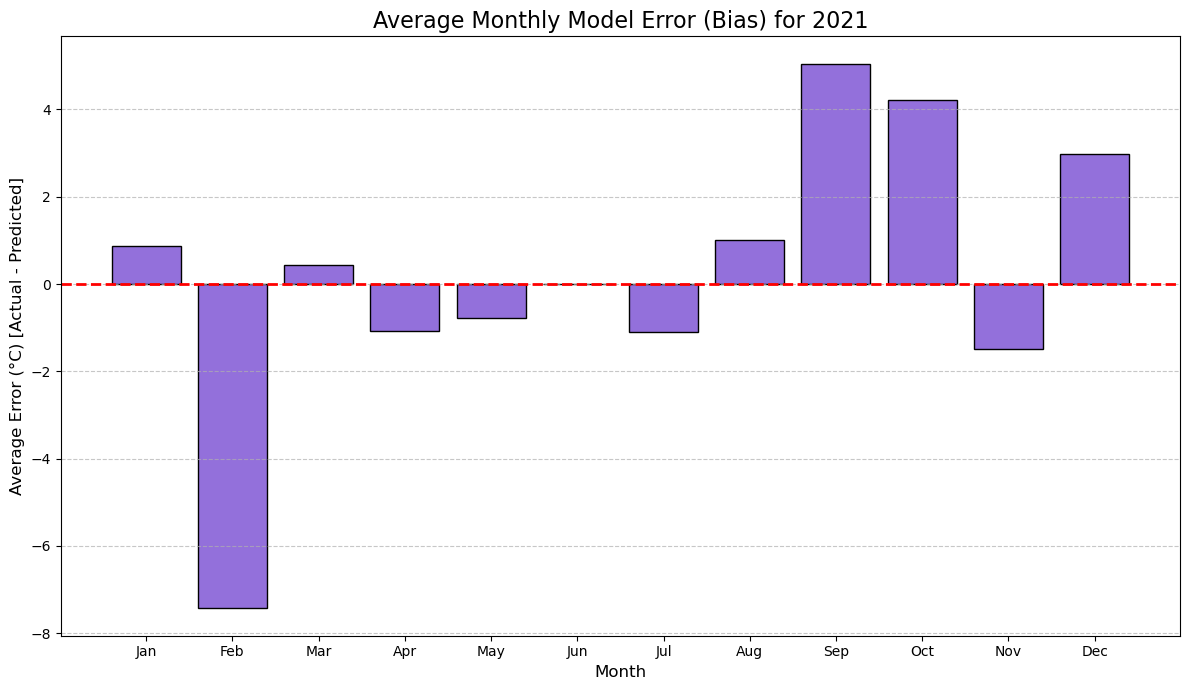



==================== ANALYZING YEAR: 2022 ====================

--- Generating Annual Cycle Plot for 2022 ---


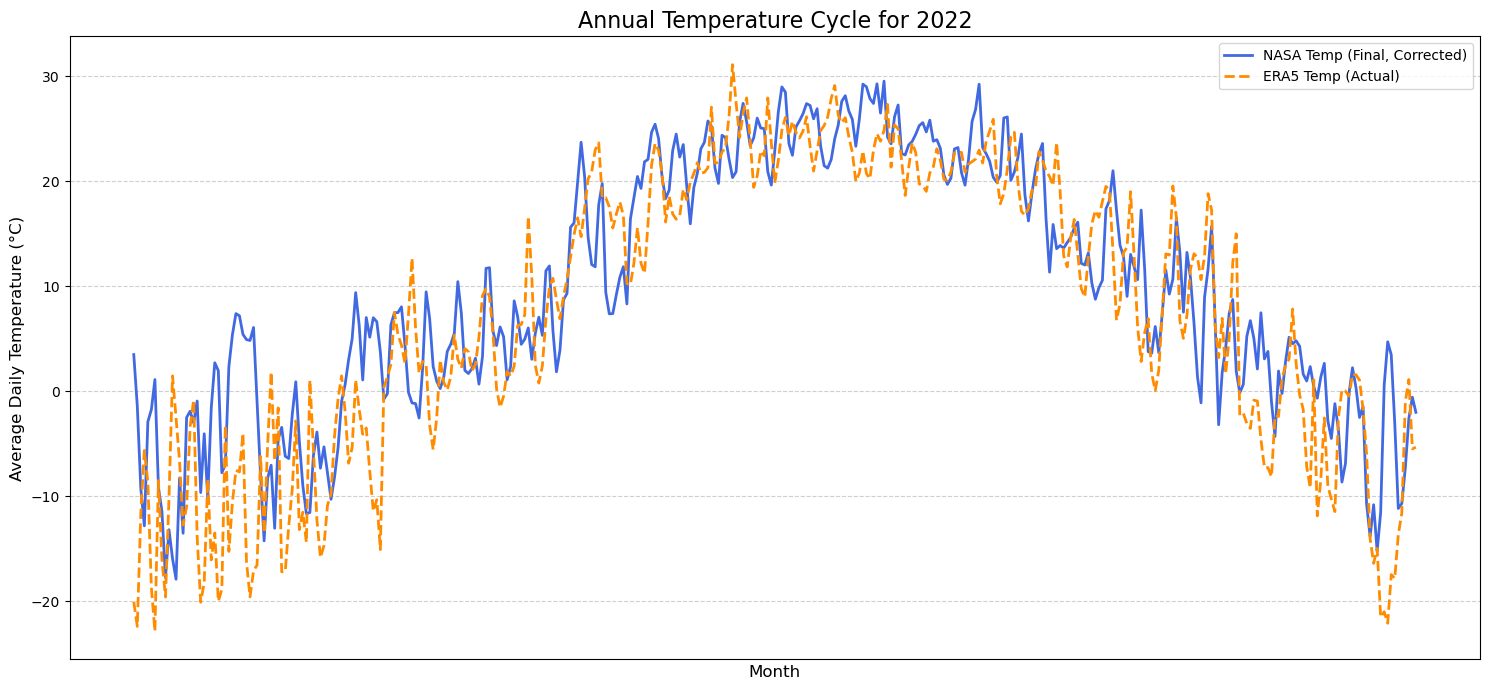


--- Generating Seasonal Bias Plot for 2022 ---


C:\Users\91788\AppData\Local\Temp\ipykernel_49596\3385489899.py:98: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_error = year_data['error'].resample('M').mean()


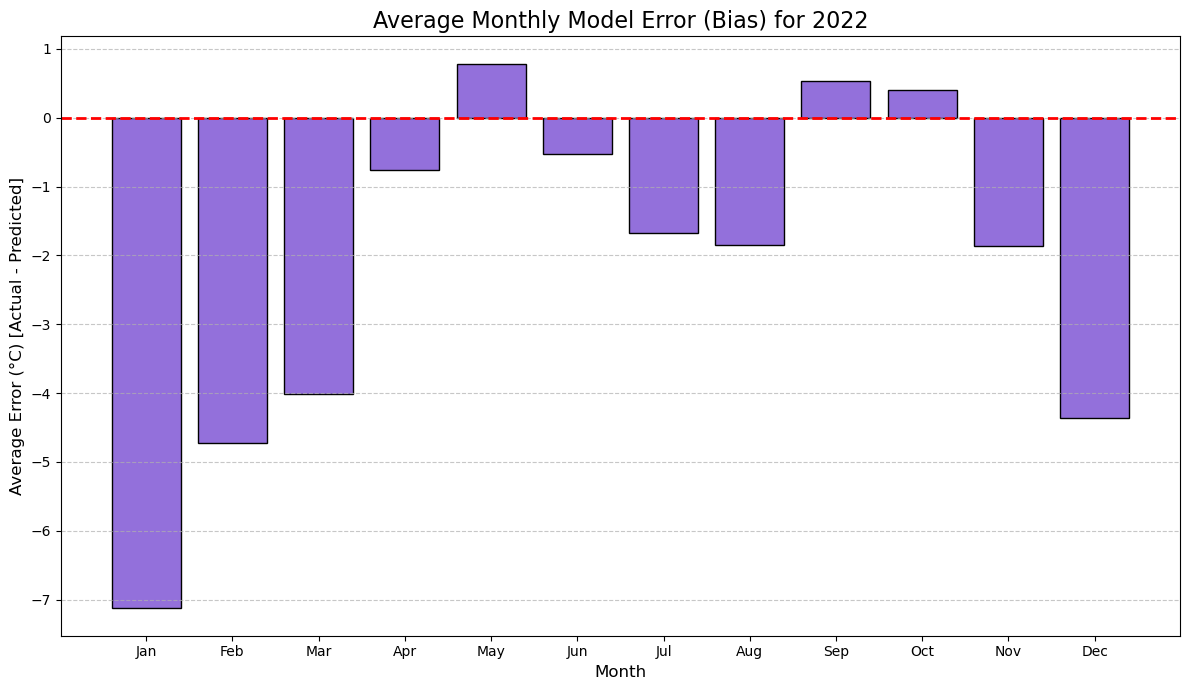



==================== ANALYZING YEAR: 2023 ====================

--- Generating Annual Cycle Plot for 2023 ---


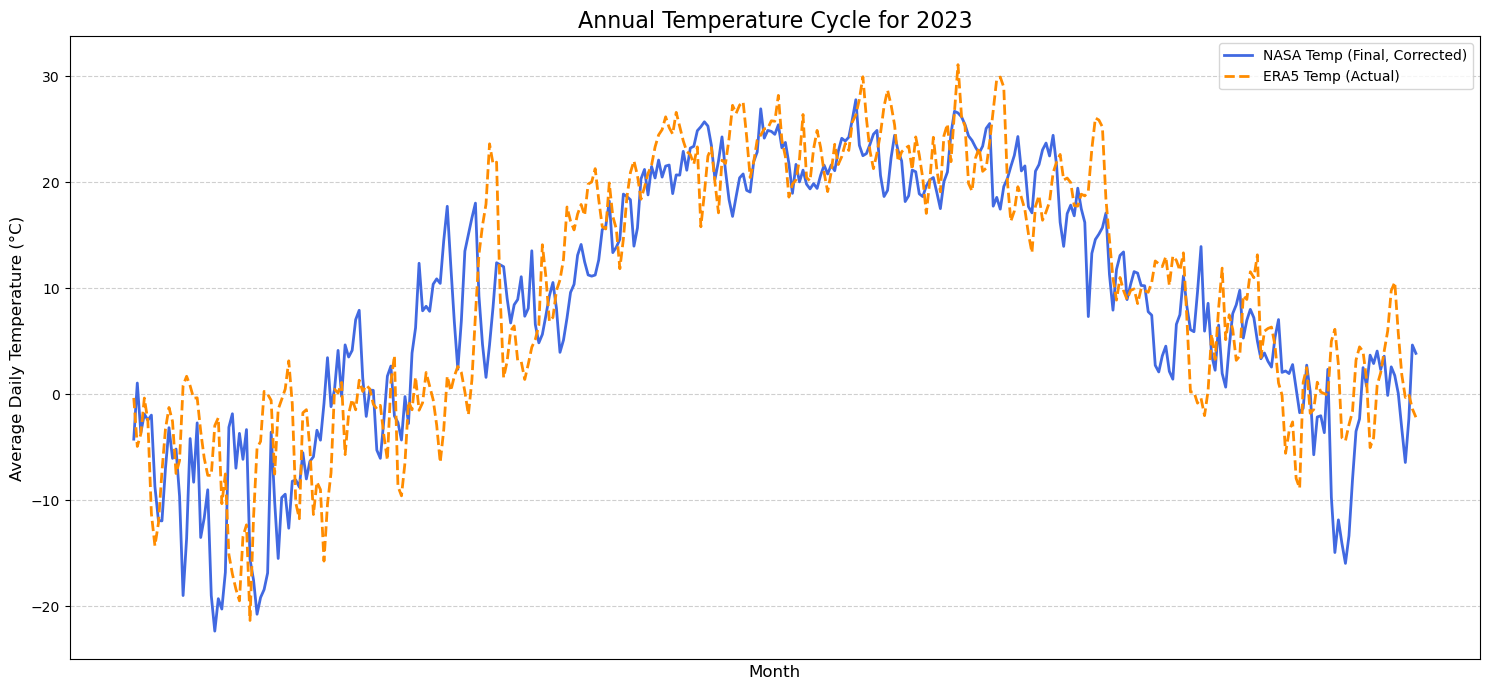


--- Generating Seasonal Bias Plot for 2023 ---


C:\Users\91788\AppData\Local\Temp\ipykernel_49596\3385489899.py:98: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_error = year_data['error'].resample('M').mean()


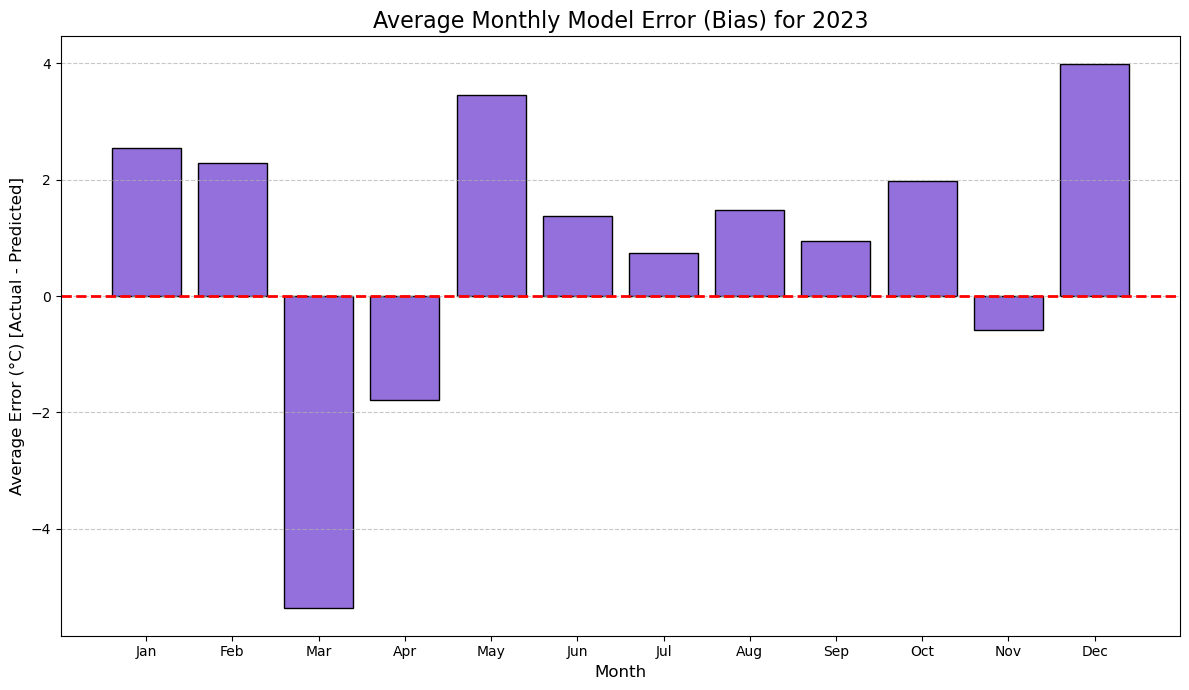



==================== ANALYZING YEAR: 2024 ====================

--- Generating Annual Cycle Plot for 2024 ---


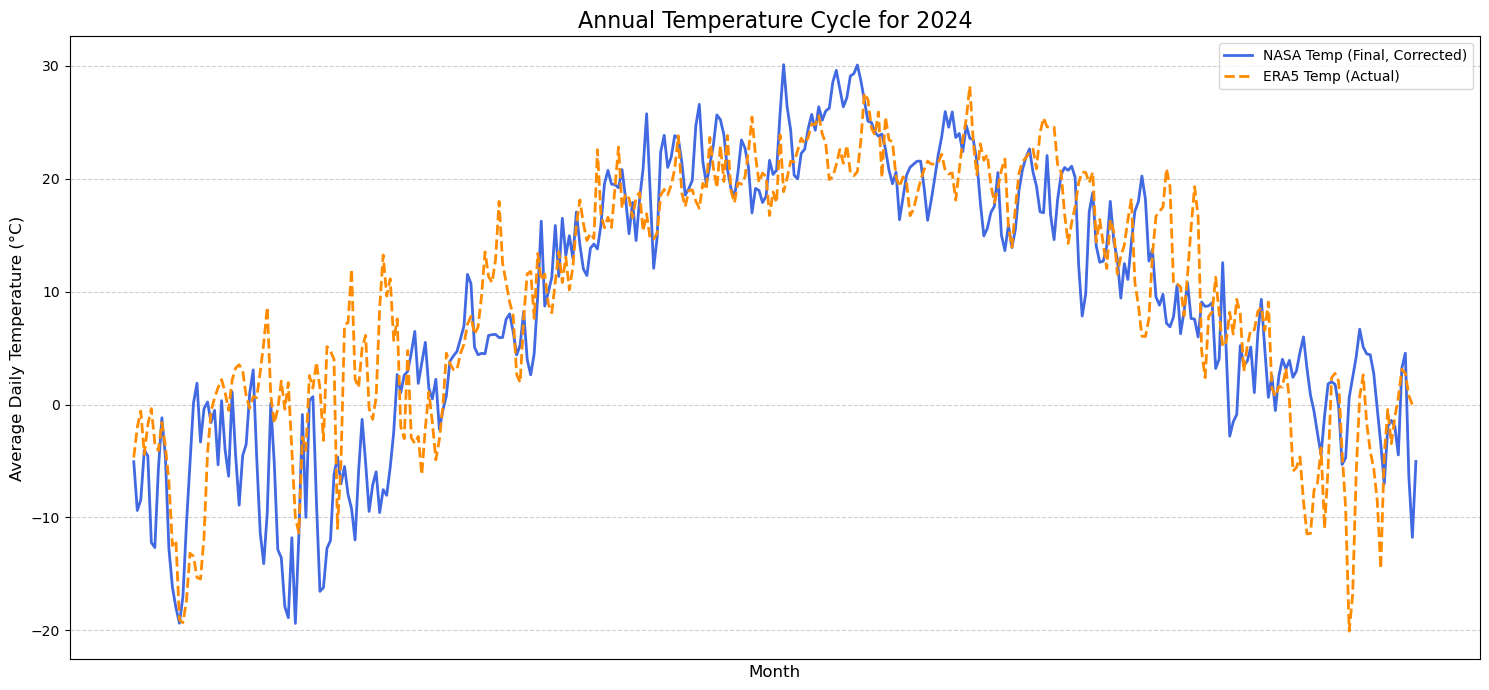


--- Generating Seasonal Bias Plot for 2024 ---


C:\Users\91788\AppData\Local\Temp\ipykernel_49596\3385489899.py:98: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_error = year_data['error'].resample('M').mean()


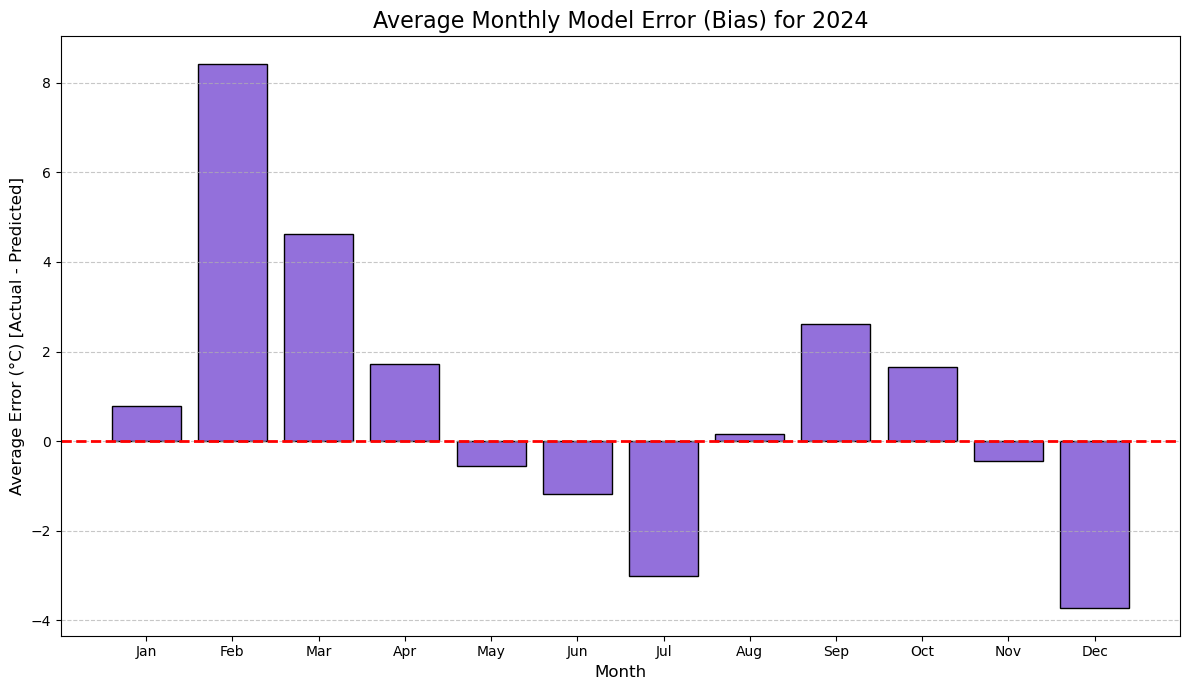

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import calendar
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Configuration ---
CSV_FILE_PATH = r"C:\Users\91788\OneDrive\Desktop\DELTA_METHOD_VALIDATION_NASA_vs_ERA5_2021-2024.csv"
# UPDATED: Set to analyze all years
YEARS_TO_ANALYZE = [2021, 2022, 2023, 2024] 

# --- Global Plotting Styles ---
NASA_COLOR = 'royalblue'
ERA5_COLOR = 'darkorange'


def load_and_prepare_data(file_path):
    """
    Loads, preprocesses, and corrects the climate data. Includes time-shift and bias correction.
    """
    try:
        print(f"Attempting to load data from '{file_path}'...")
        df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')
        print("Data loaded successfully.")

        # --- Step 1: Convert temperatures ---
        df['nasa_temp_c'] = df['predicted_air_temperature_k'] - 273.15
        df['era5_temp_c'] = df['actual_air_temperature_k'] - 273.15
        
        # --- Step 2: Apply time shift ---
        df['nasa_temp_c_shifted'] = df['nasa_temp_c'].shift(-12)
        
        # --- Step 3: Apply bias correction ---
        mean_bias = (df['nasa_temp_c_shifted'] - df['era5_temp_c']).mean()
        print(f"Calculated Mean Bias across entire dataset: {mean_bias:.2f} °C")
        df['nasa_temp_final'] = df['nasa_temp_c_shifted'] - mean_bias
        
        return df
    except Exception as e:
        print(f"An error occurred during data loading/preparation: {e}")
        return None

def plot_annual_cycle(df, year):
    """
    OPTION 2: Plots the daily average temperature for a full year to show the seasonal cycle.
    """
    print(f"\n--- Generating Annual Cycle Plot for {year} ---")
    
    # Select data for the specified year
    year_data = df[df.index.year == year].dropna()
    if year_data.empty:
        print(f"No data available for {year}.")
        return

    # Resample to daily frequency by taking the mean of all hours in a day
    daily_actual = year_data['era5_temp_c'].resample('D').mean()
    daily_predicted = year_data['nasa_temp_final'].resample('D').mean()

    plt.figure(figsize=(15, 7))
    plt.plot(daily_predicted.index, daily_predicted.values, label='NASA Temp (Final, Corrected)', color=NASA_COLOR, linewidth=2)
    plt.plot(daily_actual.index, daily_actual.values, label='ERA5 Temp (Actual)', color=ERA5_COLOR, linestyle='--', linewidth=2)
    
    plt.title(f'Annual Temperature Cycle for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Daily Temperature (°C)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Format the x-axis to show month abbreviations
    ax = plt.gca()
    # Set major ticks to the 15th of each month
    ax.xaxis.set_major_locator(mticker.FixedLocator([md.timestamp() for md in daily_actual.index[daily_actual.index.day == 15]]))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: pd.to_datetime(val, unit='s').strftime('%b')))
    
    # CORRECTED: Explicitly disable minor ticks to prevent the DTypePromotionError
    ax.xaxis.set_minor_locator(mticker.NullLocator())

    plt.tight_layout()
    plt.show()

def plot_seasonal_bias(df, year):
    """
    OPTION 1: Plots the average monthly error to visualize seasonal bias.
    """
    print(f"\n--- Generating Seasonal Bias Plot for {year} ---")
    
    # Select data for the specified year
    year_data = df[df.index.year == year].dropna()
    if year_data.empty:
        print(f"No data available for {year}.")
        return

    # Calculate the error (residuals)
    year_data['error'] = year_data['era5_temp_c'] - year_data['nasa_temp_final']
    
    # Group by month and calculate the mean error for each month
    monthly_error = year_data['error'].resample('M').mean()
    month_names = monthly_error.index.strftime('%b')

    plt.figure(figsize=(12, 7))
    plt.bar(month_names, monthly_error.values, color='mediumpurple', edgecolor='black')
    
    # Add a horizontal line at zero for reference
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    
    plt.title(f'Average Monthly Model Error (Bias) for {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Error (°C) [Actual - Predicted]', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to run the high-level annual analysis.
    """
    master_df = load_and_prepare_data(CSV_FILE_PATH)
    if master_df is None: return

    # --- UPDATED: Loop through all specified years to generate plots for each ---
    for year in YEARS_TO_ANALYZE:
        print("\n\n" + "="*20 + f" ANALYZING YEAR: {year} " + "="*20)
        # Plot 1: Shows how well the model tracks the overall seasonal trend
        plot_annual_cycle(master_df, year=year)
        
        # Plot 2: Directly visualizes the seasonal nature of the model's error
        plot_seasonal_bias(master_df, year=year)

if __name__ == "__main__":
    main()


###  Key Findings:

####  Functional Time Offset:
- A **12-hour offset**, introduced by the method of converting daily data into hourly predictions, was the **primary cause** of the **inverted diurnal cycle**.
- This was **not** a typical timezone error, but a **functional artifact** of the model architecture.

####  Seasonal & Temperature-Dependent Bias:
- The model exhibits a **non-uniform bias**:
  - Stronger in **winter**
  - Varies depending on the **temperature range**
- A **simple mean bias correction** is **not sufficient** across seasons.

---

###  Next Steps:

Future model iterations should include:

- **Adaptive, context-aware correction techniques**  
  e.g. temperature-conditioned or seasonal adjustment models
- Exploration of **advanced hybrid methods** like:
  - **SARIMAX models**
  - **LSTM neural networks**
  - **Residual bias learning layers**